# Face Alignment - Data Analysis

- Add the project's root directory (two levels up) to the Python path so the modules can be imported, even if they arent in the current working directory:

In [1]:
import sys
import os

project_root = os.path.abspath(os.path.join('..', '..'))
if project_root not in sys.path:
    sys.path.append(project_root)

- Import the required libraries and modules, as well as our utility functions:

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from src.utils import load_config, get_project_root

## 1. Data Loading and Exploration

- Load the config using the utility function. Get paths to relevant folders/files needed to save and retrieve files:

In [3]:
config = load_config()

train_data_path = os.path.join(get_project_root(), config['data']['task2']['raw']['train'])
test_data_path = os.path.join(get_project_root(), config['data']['task2']['raw']['test'])

raw_test_data = os.path.join(get_project_root(), test_data_path.replace('/', os.sep))
raw_train_data = os.path.join(get_project_root(), train_data_path.replace('/', os.sep))

- Load the training data, reference the images and image landmarks:

In [4]:
data = np.load(raw_train_data, allow_pickle=True)
images = data['images']
pts = data['points']

- Print some key information about our images and points:

In [5]:
print("Training images shape:", images.shape)
print("Landmark points shape:", pts.shape)

Training images shape: (2811, 256, 256, 3)
Landmark points shape: (2811, 5, 2)


- Load the test data, reference the images:

In [6]:
test_data = np.load(raw_test_data, allow_pickle=True)
test_images = test_data['images']

- Print some key information about our images:

In [7]:
print("Test images shape:", test_images.shape)

Test images shape: (554, 256, 256, 3)


## 2. Data Visualisation

- This will display a selected image with red '+' marked at the specific landmark locations

In [8]:
def show_points_on_image(image, points):
    plt.imshow(image, cmap='gray')
    plt.plot(points[:, 0], points[:, 1], '+', color='tomato')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

- Choose 3 images by random, with their corresponding landmark points:

In [ ]:
for i in range(3):
    max = images.shape[0]
    random_index = np.random.randint(0, max)
    image = images[random_index]
    points = pts[random_index]
    show_points_on_image(image, points)

## 3. Mean Face

- Get the mean of all images and the mean of all landmark points, and plot them together. This will give us a good idea of where abouts the points are coming:

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [52.924226254002136..195.61721807186055].


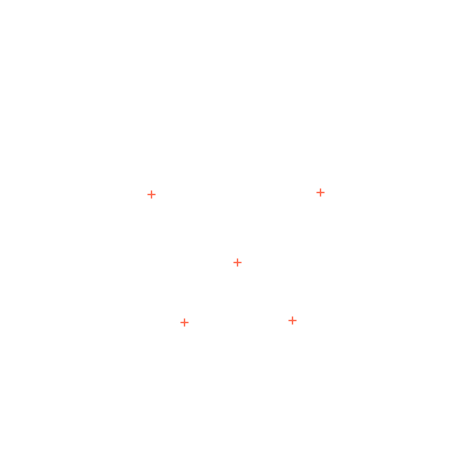

In [10]:
mean_image = np.mean(images, axis=0) # does not really produce a mean face, potentially fix but not an issue as long as we can see mean landmarks
mean_points = np.mean(pts, axis=0)

show_points_on_image(mean_image, mean_points)

## 4. Statistical Analysis

- Get a standard deviation of the landmarks to see consistency and variability between where landmarks are being placed:

In [11]:
landmark_std = np.std(pts, axis=0)

plt.figure(figsize=(10, 4))

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

- Plot the standard deviation of the x-coordinates:

Text(0, 0.5, 'Standard Deviation')

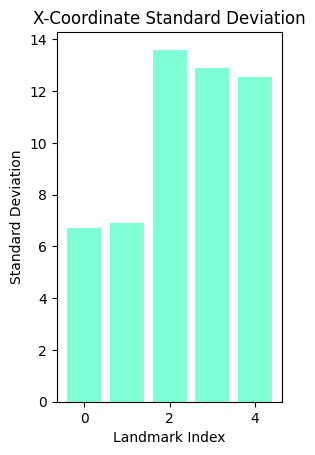

In [12]:
plt.subplot(1, 2, 1)
plt.bar(range(5), landmark_std[:, 0], color='aquamarine')
plt.title("X-Coordinate Standard Deviation")
plt.xlabel("Landmark Index")
plt.ylabel("Standard Deviation")

- Plot the standard deviation of the y-coordinates:

Text(0, 0.5, 'Standard Deviation')

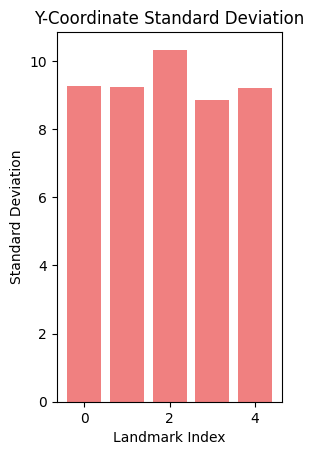

In [13]:
plt.subplot(1, 2, 2)
plt.bar(range(5), landmark_std[:, 1], color='lightcoral')
plt.title("Y-Coordinate Standard Deviation")
plt.xlabel("Landmark Index")
plt.ylabel("Standard Deviation")

In [14]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

- Heatmap of landmarked positions:

In [15]:
# Flatten x and y coordinates into single arrays
x_points = pts[:, :, 0]
y_points = pts[:, :, 1]

x_coords = x_points.flatten()
y_coords = y_points.flatten()

- Create a 2D histogram to show where abouts landmarks are being positioned:

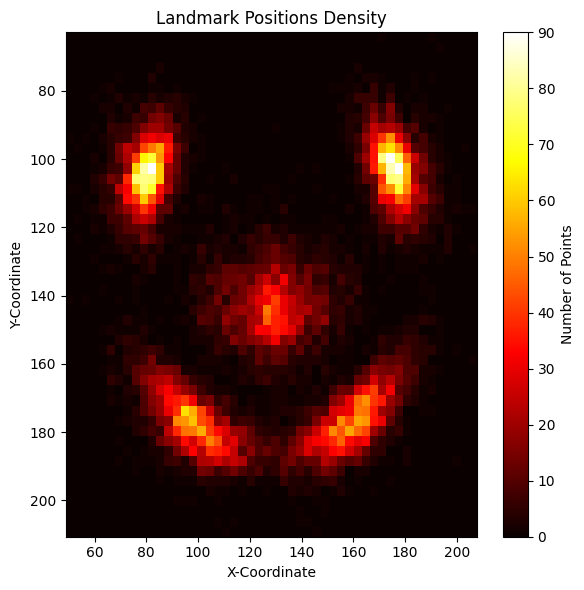

In [16]:
plt.figure(figsize=(6, 6))
plt.hist2d(x_coords, y_coords, bins=50, cmap='hot')
plt.title('Landmark Positions Density')
plt.xlabel('X-Coordinate')
plt.ylabel('Y-Coordinate')

plt.colorbar(label='Number of Points')
plt.gca().invert_yaxis() # match image coords
plt.tight_layout()
plt.show()

## 5. Correlation Between Points

- Flatten landmarks into a single vector, and then compute the correlation matrix:

In [17]:
flattened_points = pts.reshape(pts.shape[0], -1)
correlation_matrix = np.corrcoef(flattened_points.T)

- Plot the correlation matrix as a heatmap:

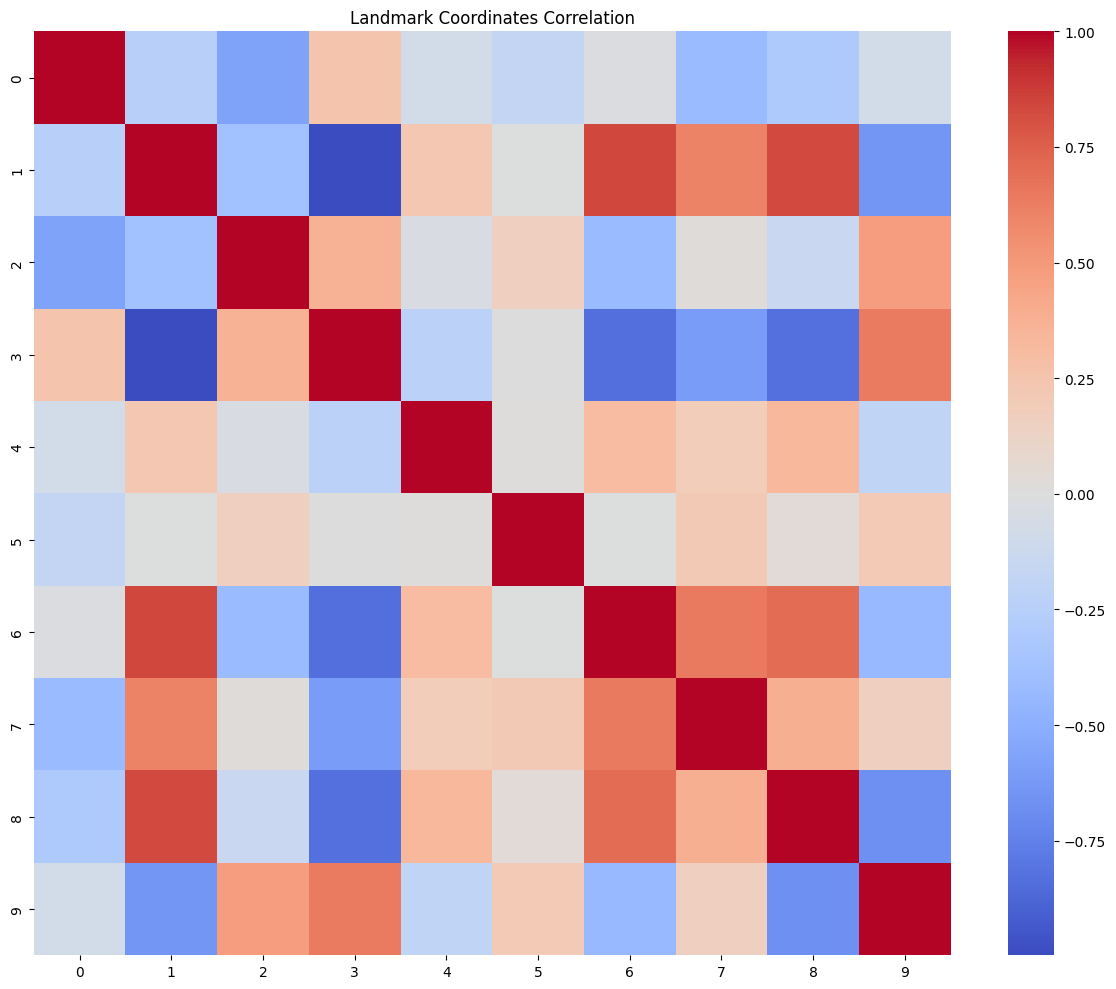

In [18]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Landmark Coordinates Correlation")
plt.tight_layout()
plt.show()